#Welcome to our Mental Health Resource Matcher!

**Make sure you have downloaded and uploaded our "DSC 288 Processed Reddit Dataset.csv" from our GitHub Page**

In [1]:
#https://github.com/ntd002/DSC-288-Capstone/blob/5e3ff3bd8f78acc2ade0a50a91f24321e2885be3/Milestone%204%3A%20Final%20Report/DSC%20288%20Processed%20Reddit%20Dataset.csv

In the code cell below, **type** your situation between the "quotes." The more text the better for our model to analyze!

In [2]:
question = ""

Then at the top click "**Runtime**" and then "**Run All**."

#Behind the Scenes Processing

In [3]:
#Test Questions taken from the top posts
#This is mainly used for testing since our model might contain some of these posts
anger = "1 Your anger may be caused by a magnesium deficiency because your neurons literally can’t calm down without magnesium. 80% of people are magnesium deficient. I tried absolutely everything to fix my chronic anger. I meditated, prayed, listened to mr. Rogers for hours, read books on anger etc. nothing was working after years of trying. I started supplementing magnesium recently and haven’t even been so much as agitated with someone in weeks. I used to regularly scream and throw things over tiny issues until I lost the people I loved. Now it’s legitimately hard to imagine getting that upset at literally anything. You could shoot my dog and I feel like I would just tell you I’m disappointed lmao. Spending $10 on some magnesium literally changed my life."
anxiety = "2 1. Anxiety makes it hard to go to sleep 2. Depression makes it hard to get out of bed 3. Drink coffee for a boost 4. Caffeine makes anxiety worse 5. Repeat Just one of the hellish cycles that anxiety gets me caught in. Can anyone else relate?"
bipolar = "3 How long did your longest depressive episode(s) last for? Bipolar 2 here. Been feeling pretty awful since early October now and it's getting pretty ridiculous at this point. Been skipping uni a lot, using all my energy on just surviving I guess, which sucks. In the past, my episodes have always passed a lot quicker so this is kinda new and weird to me. I thought it would be interesting to hear about the longest episodes others have had to maybe not feel as weird about the unfamiliar situation that I'm currently going through."
depression = "4 Shout out to the particular hell that is functional depression. This is me. Don’t get me wrong, it’s better than don’t-leave-my-bed-for-a-week depression. I am grateful I can be an independent person. But there is something uniquely horrible about being able to go to work every day, occasionally clean up after yourself, pay your bills, generally put yourself together enough to look like a human being... but that’s it. Nothing else. No social life. No hobbies. Constantly battling your mind. And being absolutely fucking exhausted all the time."
eating_disorder = "5 Does anyone else feel like eating disorders are similar to drug addictions? I feel like an addict with my ED -my Ana got really bad one summer and I’m much better now but I feel like it’s always there and every now and then it creeps back up. Just like addicts can get clean but it doesn’t mean they’re no longer addicts. Even if they’re not drinking or using, they’re still thinking about it obsessively and struggling with it. - I have relapses -I feel so much guilt because I know I’m hurting my body by not giving it what it needs. I have self love and want to nourish, heal, and strengthen my body. But it’s hard when the Ana is there holding me back. Just like addicts know what they’re doing hurts them and maybe they want to get better but its not that easy. -I feel like an outsider with it. Just like addicts say people on the outside don’t understand, I feel like people without ED’s don’t. It’s a whole other world."
panic = "6 A therapist gave me great advice too help with panic attacks today She said to fill a sink with cool/cold water and to put your head in it for 30 seconds. Apparently when your body is underwater, it adapts to survive and lowers your heart rate and slows your breathing. She also said if you have a bag of frozen peas you can cover your face with them for 30 seconds. She also said “ you’ve had better days before this and you’ll have better days after this.” I hope this helps someone or is another thing you can turn to when you get an attack"
all = "anger anxiety bipolar depression eating panic"
#question = bipolar

In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

df = pd.read_csv('DSC 288 Processed Reddit Dataset.csv')

In [5]:
import re
import string
from bs4 import BeautifulSoup

!pip install nltk
import nltk
nltk.download('punkt_tab')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [6]:
#Lowercase
question = question.lower()
print(question)

3 how long did your longest depressive episode(s) last for? bipolar 2 here. been feeling pretty awful since early october now and it's getting pretty ridiculous at this point. been skipping uni a lot, using all my energy on just surviving i guess, which sucks. in the past, my episodes have always passed a lot quicker so this is kinda new and weird to me. i thought it would be interesting to hear about the longest episodes others have had to maybe not feel as weird about the unfamiliar situation that i'm currently going through.


In [7]:
#Remove punctuation
question = question.translate(str.maketrans('', '', string.punctuation))
print(question)

3 how long did your longest depressive episodes last for bipolar 2 here been feeling pretty awful since early october now and its getting pretty ridiculous at this point been skipping uni a lot using all my energy on just surviving i guess which sucks in the past my episodes have always passed a lot quicker so this is kinda new and weird to me i thought it would be interesting to hear about the longest episodes others have had to maybe not feel as weird about the unfamiliar situation that im currently going through


In [8]:
#Remove emojis and special characters
question = "".join(char for char in question if char.isalnum() or char.isspace())
print(question)

3 how long did your longest depressive episodes last for bipolar 2 here been feeling pretty awful since early october now and its getting pretty ridiculous at this point been skipping uni a lot using all my energy on just surviving i guess which sucks in the past my episodes have always passed a lot quicker so this is kinda new and weird to me i thought it would be interesting to hear about the longest episodes others have had to maybe not feel as weird about the unfamiliar situation that im currently going through


In [9]:
#Remove numbers
question = ''.join([i for i in question if not i.isdigit()])
print(question)

 how long did your longest depressive episodes last for bipolar  here been feeling pretty awful since early october now and its getting pretty ridiculous at this point been skipping uni a lot using all my energy on just surviving i guess which sucks in the past my episodes have always passed a lot quicker so this is kinda new and weird to me i thought it would be interesting to hear about the longest episodes others have had to maybe not feel as weird about the unfamiliar situation that im currently going through


In [10]:
#Tokenize
question = nltk.word_tokenize(question)
print(question)

['how', 'long', 'did', 'your', 'longest', 'depressive', 'episodes', 'last', 'for', 'bipolar', 'here', 'been', 'feeling', 'pretty', 'awful', 'since', 'early', 'october', 'now', 'and', 'its', 'getting', 'pretty', 'ridiculous', 'at', 'this', 'point', 'been', 'skipping', 'uni', 'a', 'lot', 'using', 'all', 'my', 'energy', 'on', 'just', 'surviving', 'i', 'guess', 'which', 'sucks', 'in', 'the', 'past', 'my', 'episodes', 'have', 'always', 'passed', 'a', 'lot', 'quicker', 'so', 'this', 'is', 'kinda', 'new', 'and', 'weird', 'to', 'me', 'i', 'thought', 'it', 'would', 'be', 'interesting', 'to', 'hear', 'about', 'the', 'longest', 'episodes', 'others', 'have', 'had', 'to', 'maybe', 'not', 'feel', 'as', 'weird', 'about', 'the', 'unfamiliar', 'situation', 'that', 'im', 'currently', 'going', 'through']


In [11]:
#Remove Stop Words
stop_words = set(stopwords.words('english'))
question = [word for word in question if word not in stop_words]
print(question)

['long', 'longest', 'depressive', 'episodes', 'last', 'bipolar', 'feeling', 'pretty', 'awful', 'since', 'early', 'october', 'getting', 'pretty', 'ridiculous', 'point', 'skipping', 'uni', 'lot', 'using', 'energy', 'surviving', 'guess', 'sucks', 'past', 'episodes', 'always', 'passed', 'lot', 'quicker', 'kinda', 'new', 'weird', 'thought', 'would', 'interesting', 'hear', 'longest', 'episodes', 'others', 'maybe', 'feel', 'weird', 'unfamiliar', 'situation', 'im', 'currently', 'going']


In [12]:
#Lemmatization
lemmatizer = WordNetLemmatizer()
question = [lemmatizer.lemmatize(word) for word in question]
print(question)

['long', 'longest', 'depressive', 'episode', 'last', 'bipolar', 'feeling', 'pretty', 'awful', 'since', 'early', 'october', 'getting', 'pretty', 'ridiculous', 'point', 'skipping', 'uni', 'lot', 'using', 'energy', 'surviving', 'guess', 'suck', 'past', 'episode', 'always', 'passed', 'lot', 'quicker', 'kinda', 'new', 'weird', 'thought', 'would', 'interesting', 'hear', 'longest', 'episode', 'others', 'maybe', 'feel', 'weird', 'unfamiliar', 'situation', 'im', 'currently', 'going']


In [13]:
#Convert back to string
question = ' '.join(question)
print(question)

long longest depressive episode last bipolar feeling pretty awful since early october getting pretty ridiculous point skipping uni lot using energy surviving guess suck past episode always passed lot quicker kinda new weird thought would interesting hear longest episode others maybe feel weird unfamiliar situation im currently going


#Behind the Scenes Predictions

In [14]:
#Opimized parameters from testing
alp = 0.1
fp = False

In [15]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['T_T_pro'])
y = df['Topic']
q = vectorizer.transform([question])

clf = MultinomialNB(alpha=alp, fit_prior=fp)
clf.fit(X, y)

MultinomialNB(alpha=0.1, fit_prior=False)

#Behind the Scenes Analytics

In [16]:
pred = clf.predict(q)
prob = clf.predict_proba(q)
con = prob[0][np.argmax(prob[0])]
classes = clf.classes_

pred_dict = dict(zip(classes, prob[0]))
sorted_dict = dict(reversed(sorted(pred_dict.items(), key=lambda item: item[1])))

print("Prediction:", pred)
print("Confidence score for the predicted label:", con)
print("Individual Probabilities:")
for key, value in sorted_dict.items():
  print("\t", key,":", value)

Prediction: ['bipolar']
Confidence score for the predicted label: 0.5635995735755573
Individual Probabilities:
	 bipolar : 0.5635995735755573
	 panic : 0.20351274785427537
	 depression : 0.1443348806288265
	 eating disorder : 0.03707955869888689
	 anxiety : 0.03218037222962563
	 anger : 0.01929286701282673


In [17]:
#15% threshold chosen because there are 6 topics and 1/6 is 0.166
threshold = 0.15
keys = list(sorted_dict.keys())
values = list(sorted_dict.values())
percent_values = [f'{i*100:.2f}%' for i in values]

if values[0] >= threshold*2:
  initial = "Your questions seems to be related to: " + keys[0]
  initial_prob = "with an "+percent_values[0]+" likelihood."
else:
  initial = "Your questions do not seem to have a strong, specific topic but could be: " + keys[0]
  initial_prob = "with an "+percent_values[0]+" likelihood."

if values[1] >= threshold:
  second = "It may also be related to: " + keys[1]
  for i in range(2, 6):
    if values[i] >= threshold:
      second += ", " + keys[i]
else:
  second = "The other topics seem too low or not enough text is given."

In [18]:
resources = {
    'anger':["https://www.apa.org/topics/anger/control", "https://www.wellnesseveryday.org/wellness-toolbox/managing-anger"],
    'anxiety':["https://www.mayoclinichealthsystem.org/hometown-health/speaking-of-health/11-tips-for-coping-with-an-anxiety-disorder", "https://www.mind.org.uk/information-support/types-of-mental-health-problems/anxiety-and-panic-attacks/self-care/"],
    'bipolar':["https://my.clevelandclinic.org/health/diseases/9294-bipolar-disorder", "https://www.michiganmedicine.org/health-lab/living-well-bipolar-disorder"],
    'depression':["https://www.mayoclinic.org/diseases-conditions/depression/symptoms-causes/syc-20356007", "https://www.nhs.uk/mental-health/self-help/tips-and-support/cope-with-depression/"],
    'eating disorder':["https://www.mayoclinic.org/diseases-conditions/eating-disorders/in-depth/eating-disorder-treatment/art-20046234", "https://lluh.org/behavioral-health/our-services/eating-disorder-programs"],
    'panic':['https://www.mayoclinic.org/diseases-conditions/panic-attacks/diagnosis-treatment/drc-20376027', "https://www.health.harvard.edu/mind-and-mood/panic-attacks-recognizing-and-managing-panic-attacks-and-preventing-future-attacks"]
    }
third = "Here are some resources that might help you:"
third_res = ""
for i in range(0,6):
  if values[i] >= threshold:
    third_res += "\n"+"\n".join(resources[keys[i]])
#third_res = "\n".join(resources[keys[0]])
#if values[1] >= threshold:
  #third_res = third_res +"\n"+ "\n".join(resources[keys[1]])

In [19]:
pieValues = []
for x in values:
  val = round(x * 100,2)
  pieValues.append(val)

#Results

Your questions seems to be related to: bipolar
with an 56.36% likelihood.

It may also be related to: panic



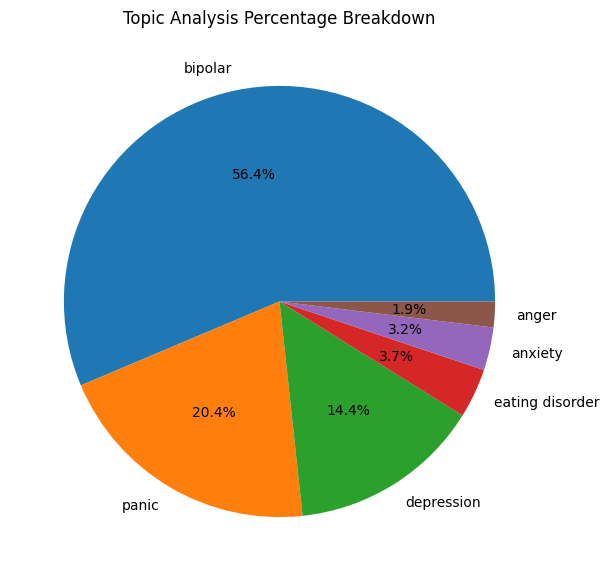


Here are some resources that might help you:
https://my.clevelandclinic.org/health/diseases/9294-bipolar-disorder
https://www.michiganmedicine.org/health-lab/living-well-bipolar-disorder
https://www.mayoclinic.org/diseases-conditions/panic-attacks/diagnosis-treatment/drc-20376027
https://www.health.harvard.edu/mind-and-mood/panic-attacks-recognizing-and-managing-panic-attacks-and-preventing-future-attacks


In [20]:
print(initial+"\n"+initial_prob+"\n"+"\n"+second+"\n")
plt.figure(figsize=(15, 7))
plt.pie(pieValues, labels=keys, autopct='%1.1f%%')
plt.title("Topic Analysis Percentage Breakdown")
plt.show()
print("\n"+third+third_res)